In [1]:
!pip install shap

In [2]:
# Gerekli kütüphanelerin import edilmesi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from scipy import stats

# 1. [span_0](start_span)Veri Setinin Yüklenmesi[span_0](end_span)
# Breast Cancer veri setini seçiyoruz
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# [span_1](start_span)1.2 Veri Çerçevesi (DataFrame) Oluşturma[span_1](end_span)
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y  # Hedef değişkeni de analizi kolaylaştırmak için ekliyoruz

print("Veri setinin ilk 5 satırı:")
print(df.head())
print("-" * 30)

# 2. Veri Seti Kalite Kontrolleri
# [span_2](start_span)2.1 Eksik Değer Analizi[span_2](end_span)
missing_values = df.isnull().sum()
print("\nHer sütundaki eksik değer sayıları:")
print(missing_values[missing_values > 0]) # Sadece eksik değer olanları gösterir

if missing_values.sum() == 0:
    print("-> Veri setinde eksik değer bulunmamaktadır.")
else:
    # Eğer eksik değer olsaydı ortalama ile dolduracaktık:
    df.fillna(df.mean(), inplace=True)
    print("-> Eksik değerler ortalama ile dolduruldu.")

# [span_3](start_span)2.2 Aykırı Değer (Outlier) Analizi - Z-Score Yöntemi[span_3](end_span)
# Sadece özellikler (features) üzerinde işlem yapıyoruz, hedef değişken hariç.
features_df = df.drop(columns=['target'])

# Z-skoru 3'ten büyük olanlar aykırı kabul edilir
z_scores = np.abs(stats.zscore(features_df))
threshold = 3
outliers = np.where(z_scores > threshold)

print(f"\nToplam Aykırı Değer Sayısı (Z-Score > 3): {len(outliers[0])}")
print("Aykırı değerlerin modele etkisi: Aykırı değerler, modelin genel kalıpları öğrenmesini zorlaştırabilir ve varyansı artırabilir. Bu projede RobustScaler kullanımı veya aykırı değerlerin baskılanması düşünülebilir.")

# [span_4](start_span)2.3 Veri Tipi ve Dağılım İncelemesi[span_4](end_span)
print("\nVeri Tipleri ve Bilgisi:")
print(df.info())

# Sayısal ve Kategorik değişken sayıları
num_cols = df.select_dtypes(include=[np.number]).columns.shape[0]
cat_cols = df.select_dtypes(include=['object', 'category']).columns.shape[0]

print(f"\nSayısal Değişken Sayısı: {num_cols}")
print(f"Kategorik Değişken Sayısı: {cat_cols}")


Veri setinin ilk 5 satırı:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  w

3.1 İstatistiksel Özellikler (İlk 10 Özellik):
                              mean        50%        min         max  \
mean radius              14.127292   13.37000    6.98100    28.11000   
mean texture             19.289649   18.84000    9.71000    39.28000   
mean perimeter           91.969033   86.24000   43.79000   188.50000   
mean area               654.889104  551.10000  143.50000  2501.00000   
mean smoothness           0.096360    0.09587    0.05263     0.16340   
mean compactness          0.104341    0.09263    0.01938     0.34540   
mean concavity            0.088799    0.06154    0.00000     0.42680   
mean concave points       0.048919    0.03350    0.00000     0.20120   
mean symmetry             0.181162    0.17920    0.10600     0.30400   
mean fractal dimension    0.062798    0.06154    0.04996     0.09744   

                               std        25%        75%  
mean radius               3.524049   11.70000   15.78000  
mean texture              4.301036   16.17

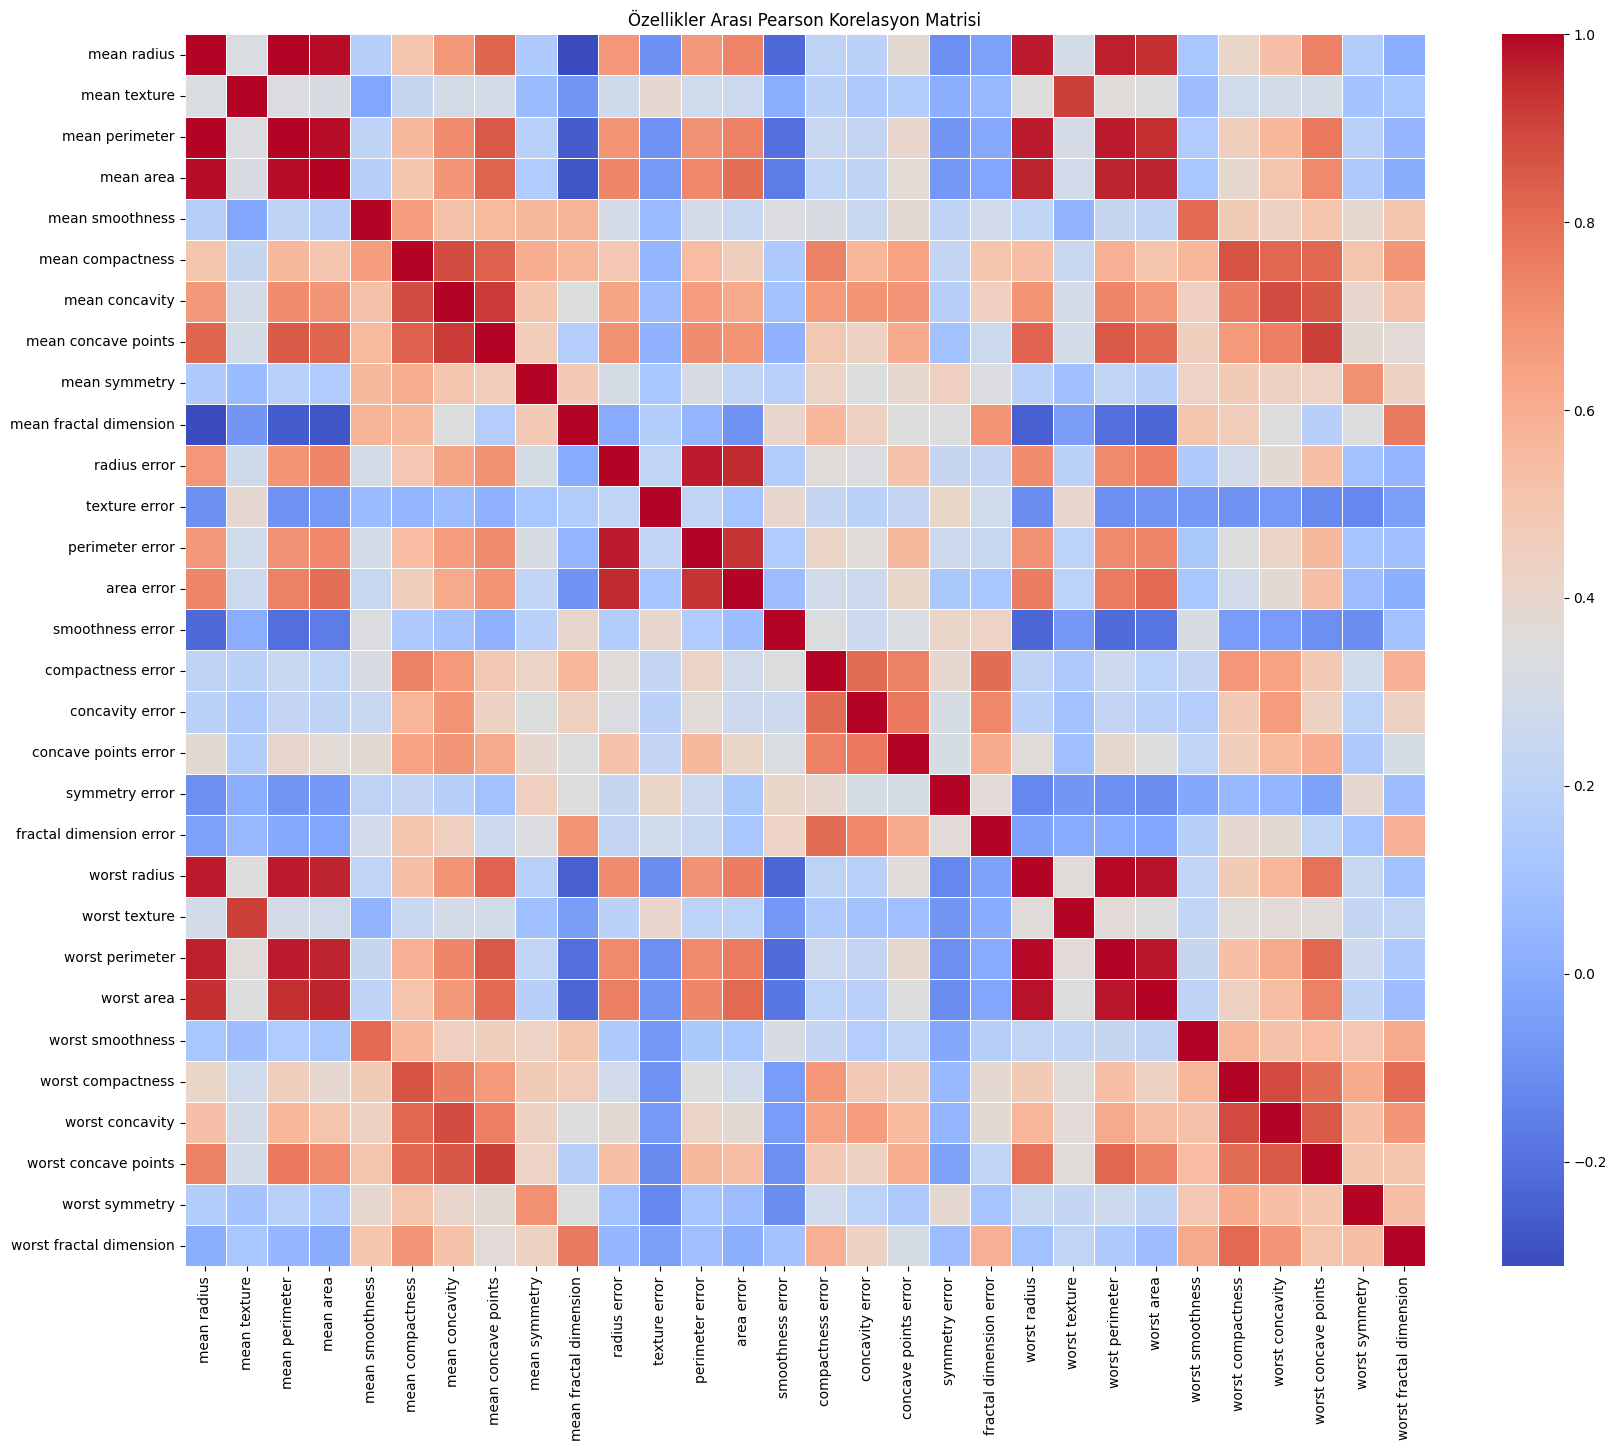


En Yüksek Korelasyonlu 3 Çift Özellik:
mean perimeter  mean radius        0.997855
worst radius    worst perimeter    0.993708
mean radius     mean area          0.987357
dtype: float64


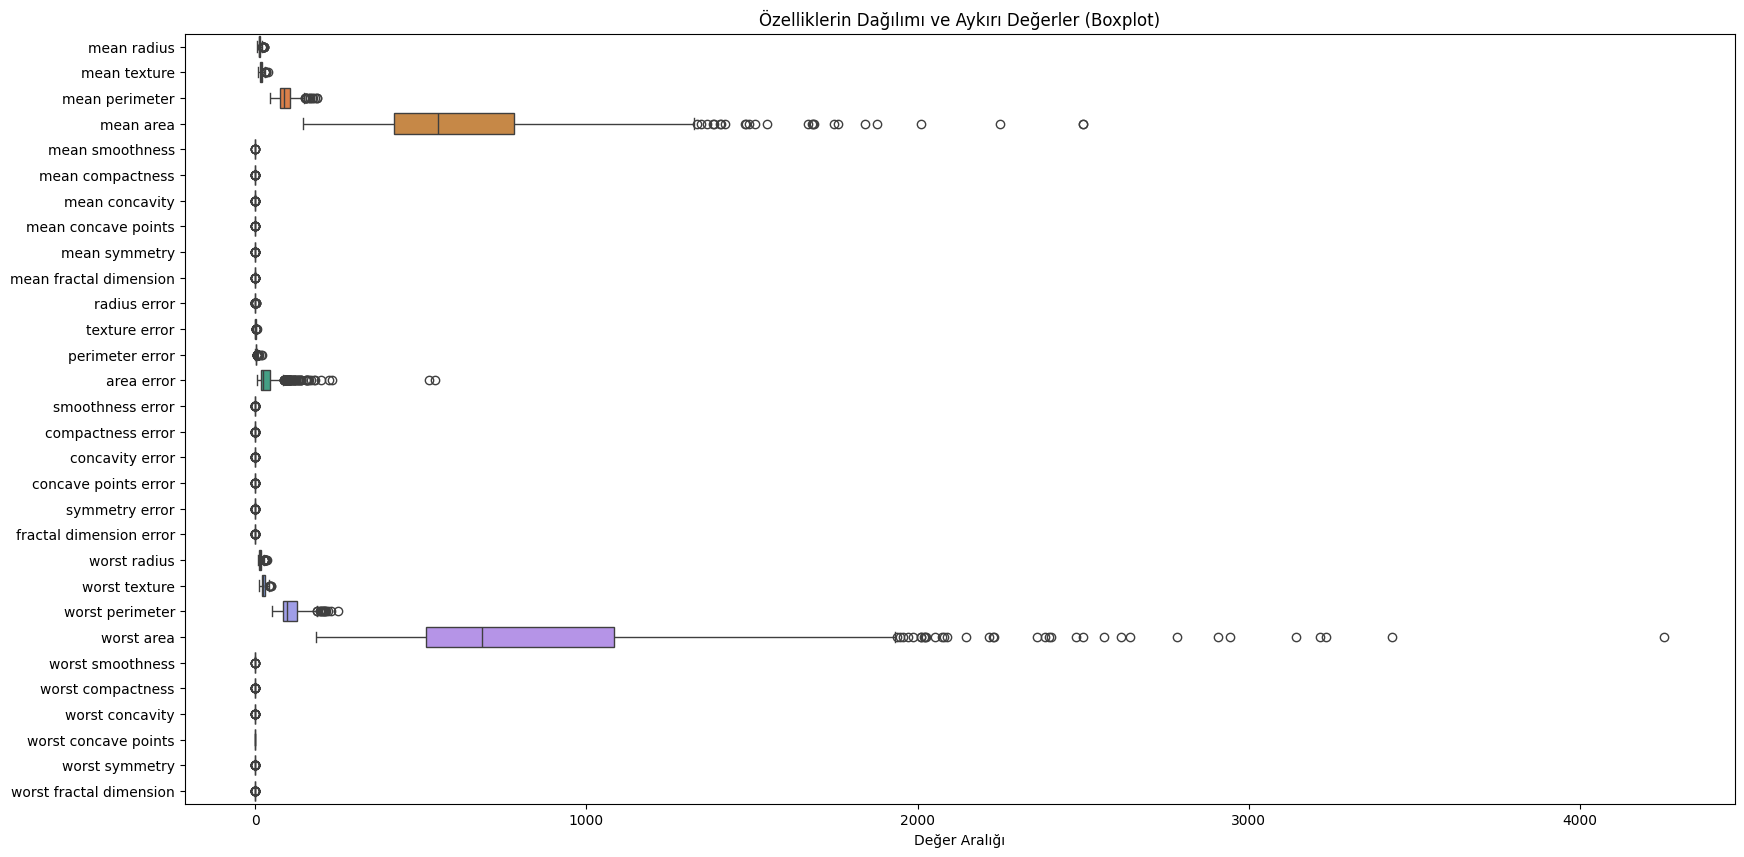


4. Veri Ölçeklendirme Tamamlandı.
Ölçeklendirilmiş verinin ilk 5 satırı (Mean ~ 0, Std ~ 1):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness
0     1.097064     -2.073335        1.269934   0.984375         1.568466
1     1.829821     -0.353632        1.685955   1.908708        -0.826962
2     1.579888      0.456187        1.566503   1.558884         0.942210
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553
4     1.750297     -1.151816        1.776573   1.826229         0.280372


In [3]:
from sklearn.preprocessing import StandardScaler

# --- 3. Keşifsel Veri Analizi (EDA) ---

# 3.1 İstatistiksel Özellikler
# describe() fonksiyonu Mean, Std, Min, Max, Q1 (25%), Median (50%), Q3 (75%) değerlerini verir.
# Transpoze (.T) alarak daha okunaklı hale getiriyoruz.
print("3.1 İstatistiksel Özellikler (İlk 10 Özellik):")
stats_summary = df.drop(columns=['target']).describe().T
print(stats_summary[['mean', '50%', 'min', 'max', 'std', '25%', '75%']].head(10))
print("-" * 30)

# 3.2 Korelasyon Matrisi ve Isı Haritası
plt.figure(figsize=(20, 16))
# Hedef değişken hariç özellikler arası korelasyon
corr_matrix = df.drop(columns=['target']).corr()

# Isı haritasını çizme
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Özellikler Arası Pearson Korelasyon Matrisi")
plt.show()

# En yüksek korelasyonlu 3 çifti bulma fonksiyonu
def get_top_correlations(corr_mat, n=3):
    # Matrisi düzleştir ve sırala
    abs_corr = corr_mat.abs().unstack()
    # Kendisiyle olan korelasyonları (1.0) çıkar
    sorted_corr = abs_corr.sort_values(kind="quicksort", ascending=False)
    sorted_corr = sorted_corr[sorted_corr < 1.0]
    # Tekrarlayan çiftleri ele (A-B ve B-A aynıdır)
    unique_corr = sorted_corr[::2]
    return unique_corr.head(n)

print("\nEn Yüksek Korelasyonlu 3 Çift Özellik:")
top_3_corr = get_top_correlations(corr_matrix)
print(top_3_corr)

# 3.3 Boxplot Analizi
# Veri seti çok geniş olduğu için görselleştirme kolaylığı adına veriyi normalize edip çiziyoruz
# (Not: Buradaki normalizasyon sadece görselleştirme içindir, model için sonra yapacağız)
plt.figure(figsize=(20, 10))
sns.boxplot(data=df.drop(columns=['target']), orient='h')
plt.title("Özelliklerin Dağılımı ve Aykırı Değerler (Boxplot)")
plt.xlabel("Değer Aralığı")
plt.show()

# --- 4. Veri Ölçeklendirme (Scaling) ---

# StandardScaler kullanımı (Önerilen)
scaler = StandardScaler()

# Sadece özellikleri (X) ölçeklendiriyoruz, hedefi (y) değil.
# X değişkeni Bölüm 1'de oluşturulmuştu.
X_scaled = scaler.fit_transform(X)

# DataFrame formatına çevirip kontrol edelim (Görsel kontrol için)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)

print("\n4. Veri Ölçeklendirme Tamamlandı.")
print("Ölçeklendirilmiş verinin ilk 5 satırı (Mean ~ 0, Std ~ 1):")
print(X_scaled_df.iloc[:5, :5]) # İlk 5 satır ve ilk 5 sütun


Veri Bölme Sonuçları:
Train Seti: 398 örnek (%70)
Val Seti:   57 örnek (%10)
Test Seti:  114 örnek (%20)
------------------------------

PCA Analizi:
Ortalama Varyans Oranı: 0.0333
Seçilen Bileşen Sayısı (Varyans > Ortalama): 6


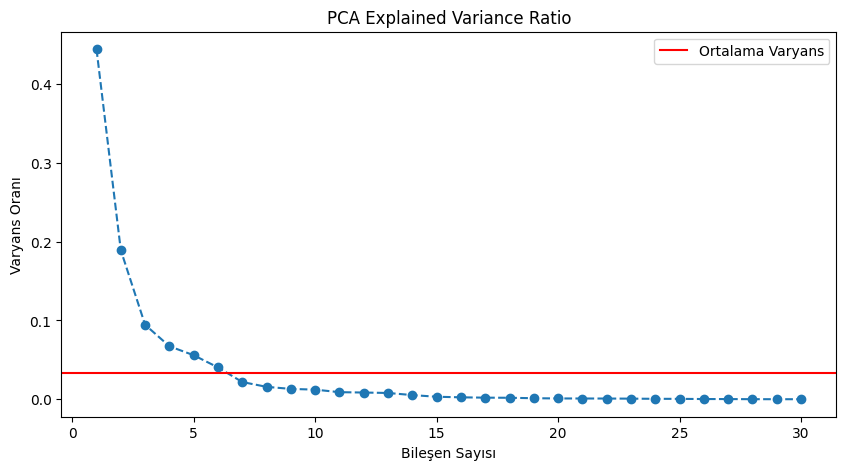

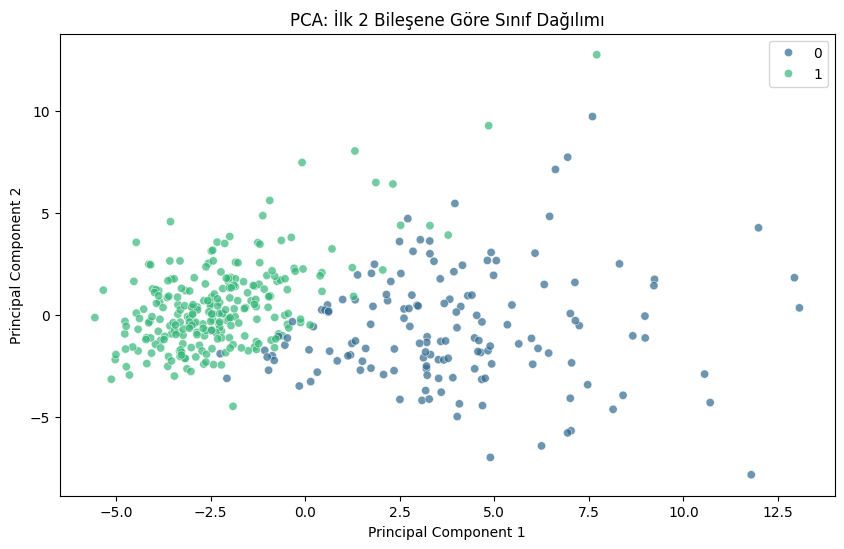


LDA Analizi:
Veri seti 2 sınıflı olduğu için kullanılabilir LDA bileşen sayısı: 1


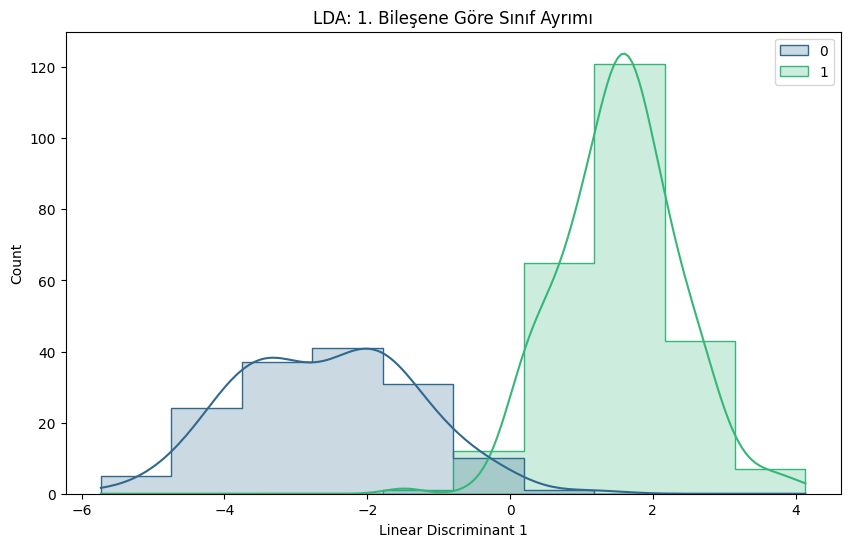

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 5. Veri Setinin Bölünmesi ---
# Hedef: %70 Training, %10 Validation, %20 Test
# Önce Test'i (%20) ayırıyoruz, geriye %80 kalıyor.
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=42, stratify=y
)

# Kalan %80'lik kısmı Training (%70) ve Validation (%10) olarak ayıracağız.
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp
)

print(f"Veri Bölme Sonuçları:")
print(f"Train Seti: {X_train.shape[0]} örnek (%70)")
print(f"Val Seti:   {X_val.shape[0]} örnek (%10)")
print(f"Test Seti:  {X_test.shape[0]} örnek (%20)")
print("-" * 30)

# --- 6. Özellik Seçimi ve Boyut İndirgeme ---

# 6.1 PCA (Principal Component Analysis)
# PCA'yı sadece TRAIN setine fit ediyoruz
pca = PCA()
pca.fit(X_train)

# Explained Variance Ratio ve Ortalama
explained_variance = pca.explained_variance_ratio_
mean_variance = np.mean(explained_variance)

# Seçim Kriteri: Ortalamadan büyük olan bileşenleri seç
n_components_pca = np.sum(explained_variance > mean_variance)
print(f"\nPCA Analizi:")
print(f"Ortalama Varyans Oranı: {mean_variance:.4f}")
print(f"Seçilen Bileşen Sayısı (Varyans > Ortalama): {n_components_pca}")

# Seçilen sayıda bileşenle PCA modelini yeniden kuruyoruz
pca_final = PCA(n_components=n_components_pca)
X_train_pca = pca_final.fit_transform(X_train)
X_val_pca = pca_final.transform(X_val)
X_test_pca = pca_final.transform(X_test)

# Grafik 1: Explained Variance Grafiği
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=mean_variance, color='r', linestyle='-', label='Ortalama Varyans')
plt.title('PCA Explained Variance Ratio')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('Varyans Oranı')
plt.legend()
plt.show()

# Grafik 2: İlk İki PCA Bileşeni ile 2D Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='viridis', alpha=0.7)
plt.title('PCA: İlk 2 Bileşene Göre Sınıf Dağılımı')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 6.2 LDA (Linear Discriminant Analysis)

print(f"\nLDA Analizi:")
n_components_lda = min(3, len(np.unique(y)) - 1) # Sınıf sayısı - 1 kuralı
print(f"Veri seti 2 sınıflı olduğu için kullanılabilir LDA bileşen sayısı: {n_components_lda}")

lda = LDA(n_components=n_components_lda)
X_train_lda = lda.fit_transform(X_train, y_train)
X_val_lda = lda.transform(X_val)
X_test_lda = lda.transform(X_test)

# Grafik 3: LDA Görselleştirme
# Tek bileşen olduğu için 2D scatter yerine Histogram çiziyoruz
plt.figure(figsize=(10, 6))
sns.histplot(x=X_train_lda.ravel(), hue=y_train, kde=True, palette='viridis', element="step")
plt.title('LDA: 1. Bileşene Göre Sınıf Ayrımı')
plt.xlabel('Linear Discriminant 1')
plt.show()

# Veri Temsillerini Hazırlama
# Sözlük yapısında tutmak modelleme döngüsünü kolaylaştıracaktır.
datasets = {
    "Ham Veri (Scaled)": (X_train, X_val, X_test),
    "PCA Verisi": (X_train_pca, X_val_pca, X_test_pca),
    "LDA Verisi": (X_train_lda, X_val_lda, X_test_lda)
}


In [5]:
# Gerekli kütüphanelerin ve metriklerin yüklenmesi
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 7. Modellerin Tanımlanması
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Naive Bayes": GaussianNB()
}

# Sonuçları saklamak için boş bir liste
results = []

print("Model eğitimi başlıyor... Lütfen bekleyiniz.\n")

# Döngü: Her Veri Temsili (Ham, PCA, LDA) için
for data_name, (train_X, val_X, test_X) in datasets.items():
    print(f"--- {data_name} üzerinde modeller eğitiliyor ---")

    # İç Döngü: Her Algoritma için
    for model_name, model in models.items():
        # 1. Modeli Eğit (Training seti ile)
        model.fit(train_X, y_train)

        # 2. Tahmin Yap (Validation seti ile)
        y_pred = model.predict(val_X)

        # ROC-AUC için olasılık değerleri gerekir (predict_proba)
        # Binary classification olduğu için pozitif sınıfın (1) olasılığını alıyoruz [:, 1]
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(val_X)[:, 1]
        else:
            y_prob = y_pred # Olasılık veremeyen modeller için (nadir) direkt tahmin

        # 3. Performans Metriklerini Hesapla
        acc = accuracy_score(y_val, y_pred)
        prec = precision_score(y_val, y_pred, zero_division=0)
        rec = recall_score(y_val, y_pred, zero_division=0)
        f1 = f1_score(y_val, y_pred, zero_division=0)
        auc = roc_auc_score(y_val, y_prob)

        # Sonuçları listeye ekle
        results.append({
            "Veri Temsili": data_name,
            "Model": model_name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-Score": f1,
            "ROC-AUC": auc
        })

# 8. Validation Performanslarının Tablo Haline Getirilmesi
results_df = pd.DataFrame(results)

# Tabloyu F1-Score'a göre büyükten küçüğe sıralayalım ki en iyiyi seçmek kolay olsun
results_df = results_df.sort_values(by="F1-Score", ascending=False)

print("\n" + "="*50)
print("TÜM MODELLERİN VALIDATION PERFORMANS KARŞILAŞTIRMASI")
print("="*50)
print(results_df)

# Tabloyu daha şık görüntülemek için (Sadece notebook ortamında işe yarar, burada print ile gösterdik)
# Raporuna eklemek için bu tabloyu kopyalayabilirsin.


Model eğitimi başlıyor... Lütfen bekleyiniz.

--- Ham Veri (Scaled) üzerinde modeller eğitiliyor ---



TÜM MODELLERİN VALIDATION PERFORMANS KARŞILAŞTIRMASI
         Veri Temsili                Model  Accuracy  Precision    Recall  \
0   Ham Veri (Scaled)  Logistic Regression  0.964912   0.972222  0.972222   
5          PCA Verisi  Logistic Regression  0.964912   0.972222  0.972222   
6          PCA Verisi        Decision Tree  0.964912   0.972222  0.972222   
3   Ham Veri (Scaled)              XGBoost  0.947368   0.945946  0.972222   
2   Ham Veri (Scaled)        Random Forest  0.947368   0.945946  0.972222   
8          PCA Verisi              XGBoost  0.947368   0.971429  0.944444   
10         LDA Verisi  Logistic Regression  0.929825   0.900000  1.000000   
14         LDA Verisi          Naive Bayes  0.929825   0.900000  1.000000   
13         LDA Verisi              XGBoost  0.929825   0.921053  0.972222   
4   Ham Veri (Scaled)          Naive Bayes  0.929825   0.944444  0.944444   
1   Ham Veri (Scaled)        Decision Tree  0.929825   0.944444  0.944444   
7          PCA Verisi 

🏆 SEÇİLEN EN İYİ MODEL: Logistic Regression
📂 KULLANILAN VERİ TEMSİLİ: Ham Veri (Scaled)
----------------------------------------

TEST SETİ PERFORMANS SONUÇLARI:
Accuracy:  0.9737
Precision: 0.9726
Recall:    0.9861
F1-Score:  0.9793
ROC-AUC:   0.9944


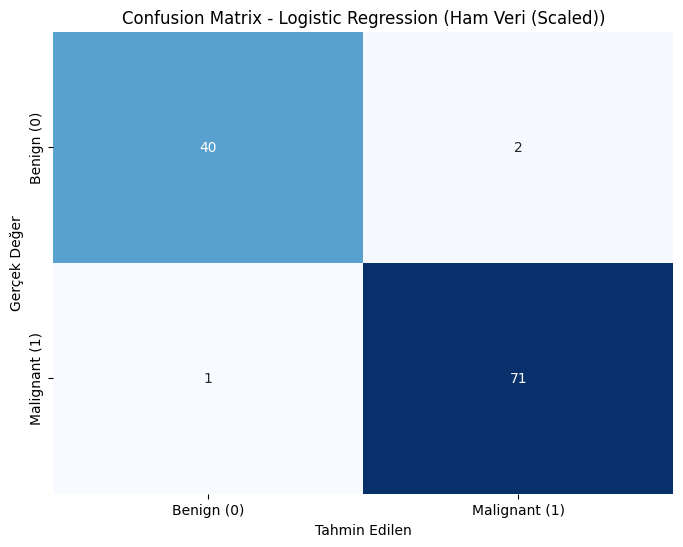

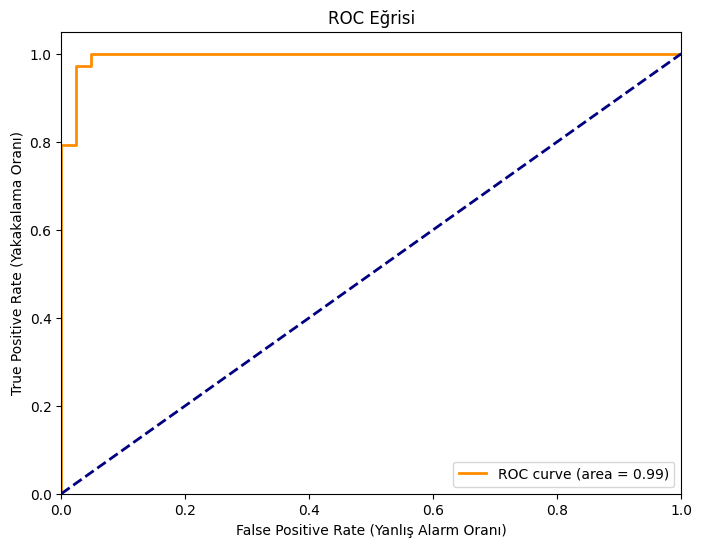


Threshold (Eşik Değeri) Yorumu:
ROC eğrisi, farklı sınıflandırma eşiklerinde (thresholds) modelin başarısını gösterir.
Eğri sol üst köşeye ne kadar yakınsa, model o kadar iyi ayırt ediyor demektir.
Eğer False Positive (yanlış alarm) oranını düşürmek istersek eşik değerini artırabiliriz, ancak bu durumda Recall düşebilir.


In [6]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay

# 9. En İyi Modelin Seçilmesi
# results_df tablosunun en üstündeki (F1 Skoru en yüksek) modeli alıyoruz
best_result = results_df.iloc[0]
best_data_name = best_result['Veri Temsili']
best_model_name = best_result['Model']

print(f"🏆 SEÇİLEN EN İYİ MODEL: {best_model_name}")
print(f"📂 KULLANILAN VERİ TEMSİLİ: {best_data_name}")
print("-" * 40)

# Seçilen veri setini (Train ve Test) alalım
# datasets sözlüğünden doğru veri çiftini çekiyoruz
X_train_best, _, X_test_best = datasets[best_data_name]

# Seçilen modeli alalım (Sıfırdan tekrar tanımlıyoruz ki temiz olsun)
best_model = models[best_model_name]

# Modeli Train setiyle (tekrar) eğitiyoruz
best_model.fit(X_train_best, y_train)

# 9.1 Test Seti Performans Metrikleri
y_pred_test = best_model.predict(X_test_best)

# Olasılık değerleri (ROC için)
if hasattr(best_model, "predict_proba"):
    y_prob_test = best_model.predict_proba(X_test_best)[:, 1]
else:
    y_prob_test = y_pred_test

print("\nTEST SETİ PERFORMANS SONUÇLARI:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_test):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_test):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_test):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_test):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_prob_test):.4f}")

# 9.2 Confusion Matrix (Isı Haritası)
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.title(f'Confusion Matrix - {best_model_name} ({best_data_name})')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

# 9.3 ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Yanlış Alarm Oranı)')
plt.ylabel('True Positive Rate (Yakakalama Oranı)')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

print("\nThreshold (Eşik Değeri) Yorumu:")
print("ROC eğrisi, farklı sınıflandırma eşiklerinde (thresholds) modelin başarısını gösterir.")
print("Eğri sol üst köşeye ne kadar yakınsa, model o kadar iyi ayırt ediyor demektir.")
print("Eğer False Positive (yanlış alarm) oranını düşürmek istersek eşik değerini artırabiliriz, ancak bu durumda Recall düşebilir.")


--- Logistic Regression (Ham Veri (Scaled)) İçin SHAP Analizi Başlatılıyor ---
SHAP değerleri başarıyla işlendi.


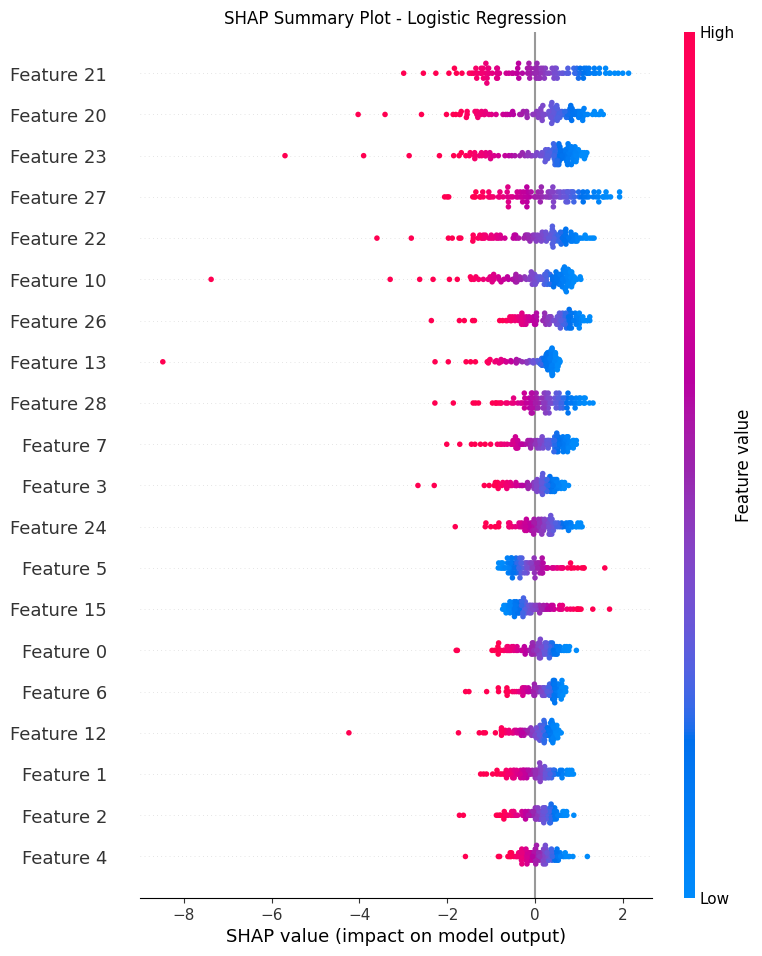

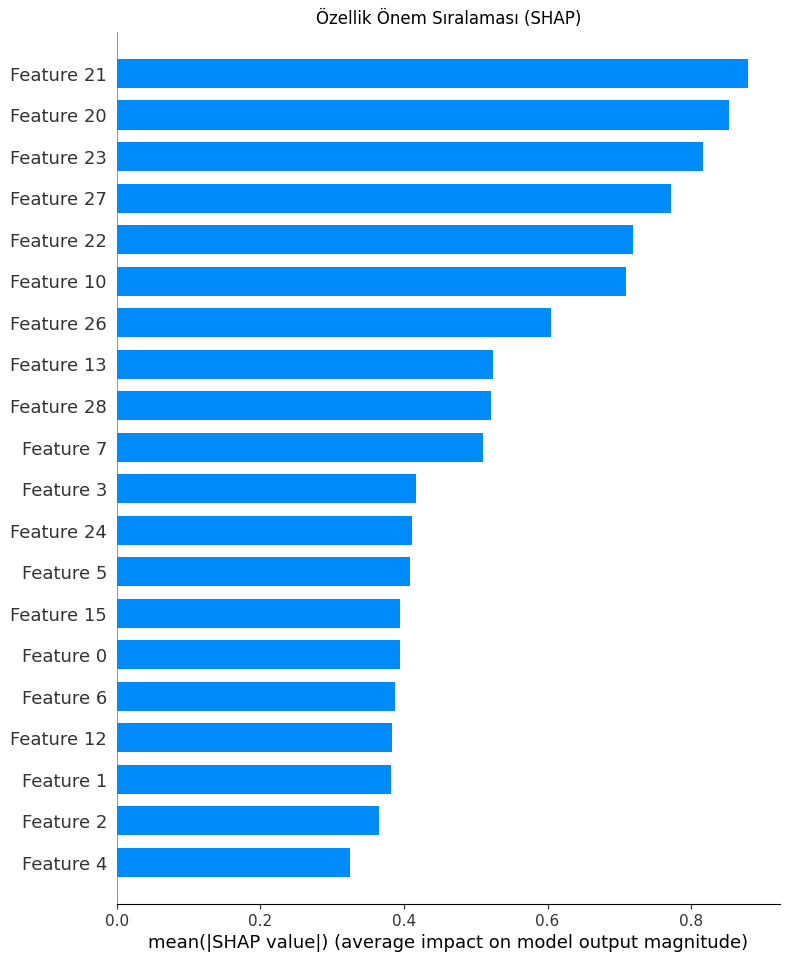

----------------------------------------
PCA ve LDA Temsilleri İçin SHAP Karşılaştırması

>>> PCA Verisi İçin SHAP Analizi:


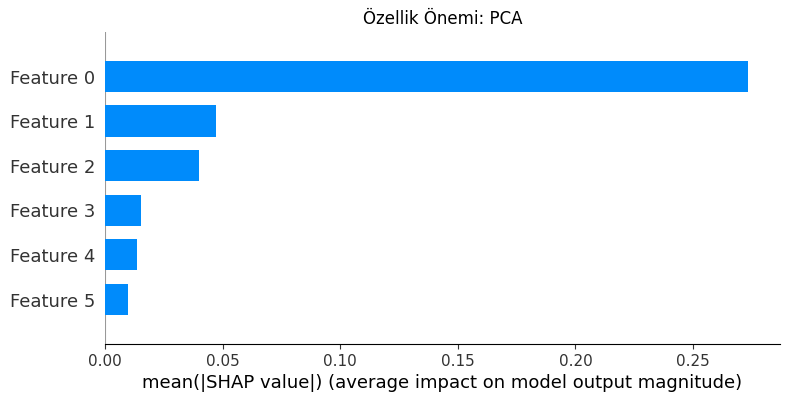


>>> LDA Verisi İçin SHAP Analizi:


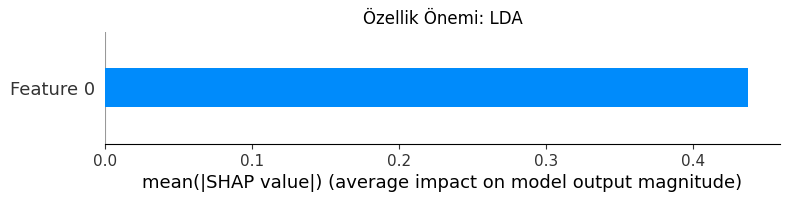

In [7]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# JS görselleştirmelerini notebook'a yükle
shap.initjs()

# 10.1 En İyi Validation Modeli için SHAP Analizi
print(f"--- {best_model_name} ({best_data_name}) İçin SHAP Analizi Başlatılıyor ---")

# Explainer Seçimi (Model türüne göre otomatik)
model_type = type(best_model).__name__

# SHAP Değerlerini Hesaplama
if model_type in ['XGBClassifier', 'RandomForestClassifier', 'DecisionTreeClassifier']:
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test_best)

elif model_type in ['LogisticRegression', 'LinearDiscriminantAnalysis']:
    explainer = shap.LinearExplainer(best_model, X_train_best)
    shap_values = explainer.shap_values(X_test_best)
else:
    print("KernelExplainer kullanılıyor (Bu işlem biraz zaman alabilir)...")
    # Kernel explainer yavaş olduğu için veriyi biraz kırpıyoruz
    explainer = shap.KernelExplainer(best_model.predict_proba, X_train_best[:50])
    shap_values = explainer.shap_values(X_test_best[:50])

# --- HATA DÜZELTME BLOĞU ---
# SHAP değerlerinin formatını kontrol edip sadece Pozitif Sınıfı (Kanser/1) seçiyoruz
def get_positive_class_shap(shap_vals):
    # Durum 1: Liste dönerse (Genelde [Class0, Class1])
    if isinstance(shap_vals, list):
        if len(shap_vals) > 1:
            return shap_vals[1] # İkinci sınıfı al (1)
        else:
            return shap_vals[0] # Tek sınıf varsa onu al

    # Durum 2: Numpy Array dönerse
    elif isinstance(shap_vals, np.ndarray):
        # Eğer 3 boyutluysa (Samples, Features, Classes) -> (N, M, 2) gibi
        if len(shap_vals.shape) == 3:
            # Son boyutta birden fazla sınıf varsa index 1'i al, yoksa 0'ı
            if shap_vals.shape[2] > 1:
                return shap_vals[:, :, 1]
            else:
                return shap_vals[:, :, 0]
        # Eğer 2 boyutluysa (Samples, Features) -> Zaten hazırdır
        else:
            return shap_vals
    return shap_vals

# Fonksiyonu uygula
shap_values_clean = get_positive_class_shap(shap_values)

print("SHAP değerleri başarıyla işlendi.")
# ---------------------------

# 10.1.a Summary Plot (Genel Bakış)
plt.figure()
shap.summary_plot(shap_values_clean, X_test_best, show=False)
plt.title(f"SHAP Summary Plot - {best_model_name}", fontsize=12)
plt.show()

# 10.1.b Bar Plot (Mutlak Önem)
plt.figure()
shap.summary_plot(shap_values_clean, X_test_best, plot_type="bar", show=False)
plt.title("Özellik Önem Sıralaması (SHAP)", fontsize=12)
plt.show()

# 10.2 PCA ve LDA Temsilleri için SHAP Karşılaştırması
print("-" * 40)
print("PCA ve LDA Temsilleri İçin SHAP Karşılaştırması")

def plot_shap_for_transform(data_name, X_train_tr, X_test_tr):
    # Hızlı sonuç için Random Forest
    temp_model = RandomForestClassifier(max_depth=3, random_state=42)
    temp_model.fit(X_train_tr, y_train)

    explainer_temp = shap.TreeExplainer(temp_model)
    shap_vals_temp = explainer_temp.shap_values(X_test_tr)

    # Aynı düzeltme fonksiyonunu burada da kullanıyoruz
    shap_vals_temp_clean = get_positive_class_shap(shap_vals_temp)

    print(f"\n>>> {data_name} Verisi İçin SHAP Analizi:")
    plt.figure()
    shap.summary_plot(shap_vals_temp_clean, X_test_tr, plot_type="bar", show=False)
    plt.title(f"Özellik Önemi: {data_name}")
    plt.show()

# PCA için
plot_shap_for_transform("PCA", datasets["PCA Verisi"][0], datasets["PCA Verisi"][2])

# LDA için
plot_shap_for_transform("LDA", datasets["LDA Verisi"][0], datasets["LDA Verisi"][2])
